In Natural Language Processing (NLP), an n-gram is a contiguous sequence of n items (or words) from a given sample of text or speech. These items can be characters, syllables, words, or even symbols. The "n" in n-gram stands for the number of these items in the sequence.

For example:

A 1-gram (or unigram) is a single word.
A 2-gram (or bigram) is a sequence of two adjacent words.
A 3-gram (or trigram) is a sequence of three adjacent words, and so on.
N-grams are widely used in NLP for several tasks including:

Language Modeling: Predicting the next word in a sentence.
Text Generation: Generating coherent sentences or paragraphs.
Machine Translation: Helping understand and translate phrases or sentences.
Speech Recognition: Modeling the probability of sequences of sounds.
Spell Checking and Auto-correction: Identifying and correcting errors based on likely word sequences.

The choice of n in n-grams depends on the specific task and the characteristics of the text being analyzed. N-grams capture the local structure of the language and are fundamental in many statistical and probabilistic models used in NLP.



Given the below problem statement 

Recommend the top 3 words to complete the given sentence using N-gram language
model. The goal is to demonstrate the relevance of recommended words based on the
occurrence of Trigram within the corpus. Use all the instances in the dataset as a training
corpus

Use a sample dataset, recommend the steps involved 

To tackle the problem of recommending the top 3 words to complete a sentence using an N-gram language model based on a given dataset, you can follow these steps:

Step 1: Understand the Dataset and Preprocess

1. Dataset Exploration: Take a look at the dataset provided. Understand its format, how sentences are structured, and any particularities such as punctuation, casing, etc.

2. Preprocessing:
    Tokenization: Split the text into tokens (words or subwords) which will form your vocabulary.
    Normalization: Convert text to lowercase to ensure uniformity (optional, depending on case sensitivity).
    Handling Start and End of Sentences: Add special tokens to mark the beginning and end of sentences if they are not already present.

Step 2: Build the N-gram Language Model
    1. N-gram Selection: Choose an appropriate value of N (typically 2 or 3 for Trigrams in this case). Trigrams are sequences of three consecutive words.
    2. Counting N-grams:
        Construct N-grams: Scan through the dataset to count occurrences of each N-gram (sequences of N words).
        Frequency Calculation: Compute frequencies or probabilities for each N-gram in the corpus.

Step 3: Sentence Completion
    1. Given Sentence: Assume you have a partially completed sentence where you need to recommend the next word(s).
    2. Candidate Generation:
        Context Extraction: Extract the last two words (for Trigrams) from the given sentence.
        Retrieve N-grams: Retrieve all Trigrams starting with the extracted sequence.

    3. Ranking Candidates:
        Probability Calculation: Calculate probabilities (or frequencies) for each candidate Trigram completion.
        Sort Candidates: Rank the candidate Trigrams based on their occurrence probabilities in descending order.
    
    4. Select Top Candidates: Choose the top 3 words from the ranked list of Trigrams as your recommendations.

Step 4: Implementation
    1. Data Structures: Use dictionaries or similar data structures to store N-gram counts or probabilities efficiently.
    2. Algorithm: Implement functions to tokenize, preprocess, build N-grams, and recommend completions.
    3. Testing and Validation: Test your model on various sentences from the dataset to ensure it recommends relevant completions.

Example Workflow

    Assume you have a dataset with sentences:
        "I love natural language processing."
        "Natural language processing is fascinating."

    Given the sentence "I love ___", using a Trigram model:
        Extract the last two words: "love natural".
        Retrieve Trigrams starting with "love natural" from your dataset.
        Calculate probabilities for each candidate Trigram completion ("language", "processing", etc.).
        Recommend the top 3 words based on these probabilities.
        
Tools and Libraries
    Python Libraries: Use libraries like NLTK, spaCy, or even simple custom Python code for text processing and N-gram modeling.
    Data Structures: Utilize dictionaries for counting and storing N-gram frequencies.

By following these steps, you can effectively build a Trigram language model and recommend relevant words to complete given sentences based on the dataset provided. Adjustments may be needed based on specific dataset characteristics and performance requirements.


Step 1: Data Cleaning and Preprocessing

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import pandas as pd

# Example dataset (replace with your own dataset)
data = pd.DataFrame({
    'text': [
        "I love these cookies. I am on the paleo diet right now and these cookies --------"
    ]
})

# Function for text cleaning and preprocessing
def clean_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Join tokens back into a string
    clean_text = ' '.join(tokens)
    
    return clean_text

# Apply cleaning function to the 'text' column
data['clean_text'] = data['text'].apply(clean_text)
print(data['clean_text'])


0    love cookies paleo diet right cookies -- -- -- --
Name: clean_text, dtype: object


In [ ]:
Step 2: Exploratory Data Analysis (EDA)

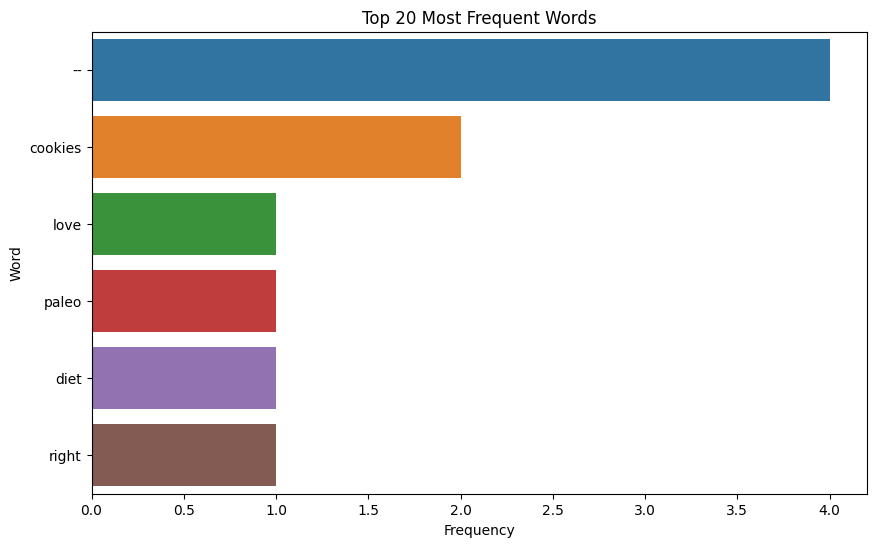

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Token distribution
all_words = ' '.join(data['clean_text']).split()
word_freq = nltk.FreqDist(all_words)
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# Plot top 20 most frequent words
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df.sort_values(by='Frequency', ascending=False).head(20))
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


In [ ]:
Step 3: Statistical Analysis

In [11]:
# Example: Calculate mean length of tokens
data['token_length'] = data['clean_text'].apply(lambda x: len(x.split()))
mean_length = data['token_length'].mean()
print(f"Mean token length: {mean_length}")


Mean token length: 10.0


In [ ]:
Step 4: Visualization

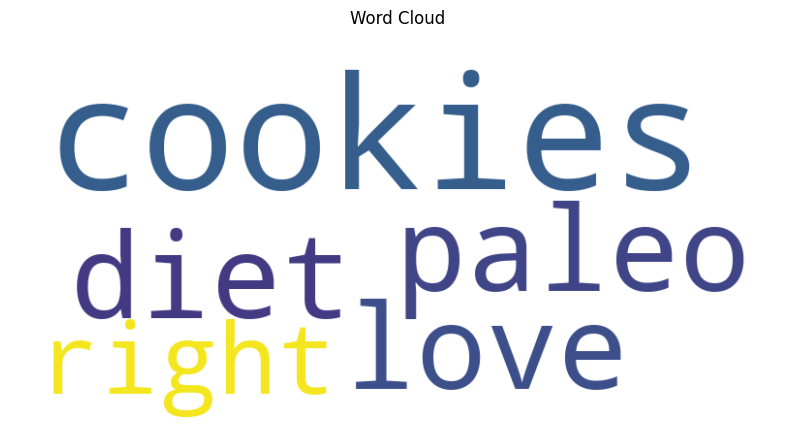

In [13]:
# Example: Word cloud visualization
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


Additional Steps (Optional)
For more advanced analysis such as sentiment analysis, topic modeling, or named entity recognition, you can integrate libraries like TextBlob for sentiment analysis, gensim for topic modeling with LDA, or spaCy for named entity recognition.

Conclusion
This code provides a basic framework for performing data analysis on an NLP dataset in Python. Depending on your specific dataset and goals, you may need to customize and expand upon these examples. NLP is a broad field, and these steps provide a foundational approach to gaining insights from textual data.